In [1]:
#Importing Functions, Libraries and Viz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydataset
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn.preprocessing
# Exploring
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
#splits, scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from pydataset import data


# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

import env
import os
import wrangle



## Exercises

### 1. Clustering with the Iris Dataset

### Using this lesson as a guide, perform clustering on the iris dataset.

### a. Choose features other than the ones used in the lesson.
### b. Visualize the results of your clustering.
### c. Use the elbow method to visually select a good value for k.
### d. Repeat the clustering, this time with 3 different features.


In [2]:
#acquire iris data
iris = sns.load_dataset('iris')


In [4]:
#check head
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.10,3.50,1.40,0.20,setosa
1,4.90,3.00,1.40,0.20,setosa
2,4.70,3.20,1.30,0.20,setosa
3,4.60,3.10,1.50,0.20,setosa
4,5.00,3.60,1.40,0.20,setosa


In [5]:
#check info
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#check the iris head
X = iris[['petal_length', 'petal_width']]
X.head()

,petal_length,petal_width
0,1.40,0.20
1,1.40,0.20
2,1.30,0.20
3,1.50,0.20
4,1.40,0.20


## Modeling

In [7]:
#Create and Fit cluster model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [8]:
#Add cluster to our original data
iris['cluster'] = clusters
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.10,3.50,1.40,0.20,setosa,0
1,4.90,3.00,1.40,0.20,setosa,0
2,4.70,3.20,1.30,0.20,setosa,0
3,4.60,3.10,1.50,0.20,setosa,0
4,5.00,3.60,1.40,0.20,setosa,0


In [9]:
#check clusters
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,cluster
species,,,,,
setosa,5.01,3.43,1.46,0.25,0.00
versicolor,5.94,2.77,4.26,1.33,1.96
virginica,6.59,2.97,5.55,2.03,1.08


[Text(0.5, 1.0, 'K-Means Clusters')]

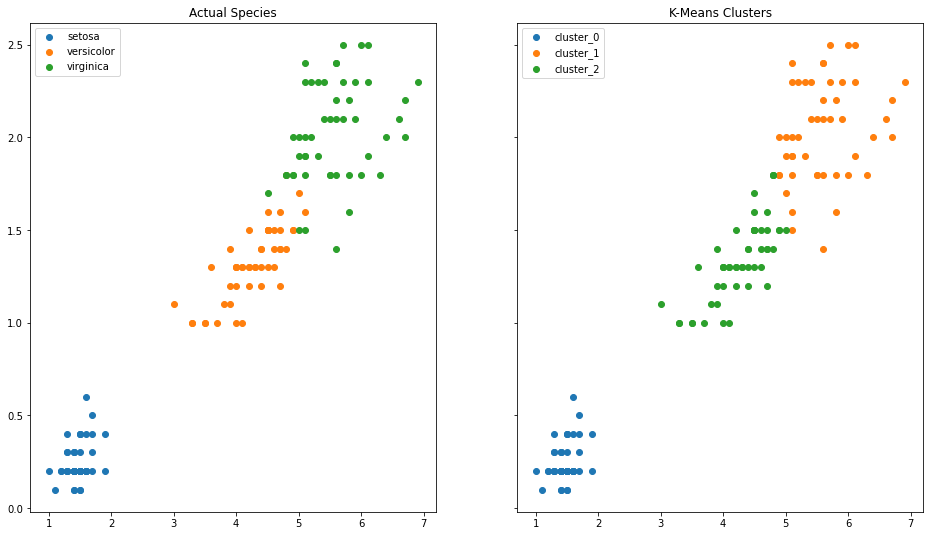

In [13]:
#function to visualize results of clustering
fig, axs = plt.subplots(1, 2, figsize=(16, 9), sharex=True, sharey=True)

for species, subset in iris.groupby('species'):
    axs[0].scatter(subset.petal_length, subset.petal_width, label=species)
    
axs[0].legend()
axs[0].set(title='Actual Species')
    
for cluster_n in iris.cluster.sort_values().unique():
    axs[1].scatter(iris[iris.cluster == cluster_n].petal_length, iris[iris.cluster == cluster_n].petal_width, label=f'cluster_{cluster_n}')

axs[1].legend()
axs[1].set(title="K-Means Clusters")

### Using elbow method to determine cluster number

Text(0.5, 1.0, 'Change in inertia as k increases')

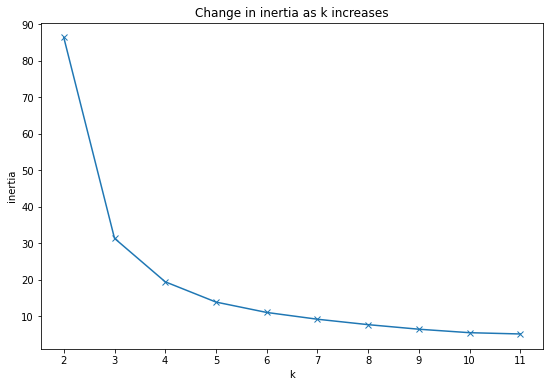

In [14]:
#plot cluster number using elbow method
plt.figure(figsize=(9, 6))
pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases')

In [ ]:
#This graph seems to show a drop off in inertia around k=4

### Visuals cluster around k=4

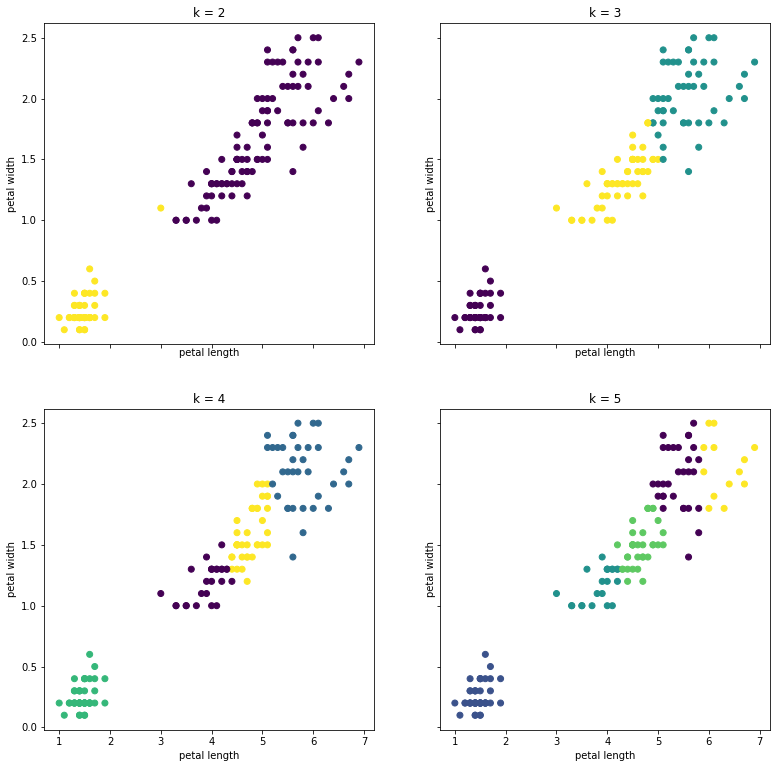

In [15]:
#visualize the clusters
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.petal_length, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='petal length', ylabel='petal width')

### Clustering on 3 features

In [16]:
#check head head on 3 features
X = iris[['petal_length', 'petal_width', 'sepal_length']]
X.head()

,petal_length,petal_width,sepal_length
0,1.40,0.20,5.10
1,1.40,0.20,4.90
2,1.30,0.20,4.70
3,1.50,0.20,4.60
4,1.40,0.20,5.00


In [17]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [18]:
#check head on the 3 feature clusters
iris['three_feature_cluster'] = clusters
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster,three_feature_cluster
0,5.10,3.50,1.40,0.20,setosa,0,1
1,4.90,3.00,1.40,0.20,setosa,0,1
2,4.70,3.20,1.30,0.20,setosa,0,1
3,4.60,3.10,1.50,0.20,setosa,0,1
4,5.00,3.60,1.40,0.20,setosa,0,1


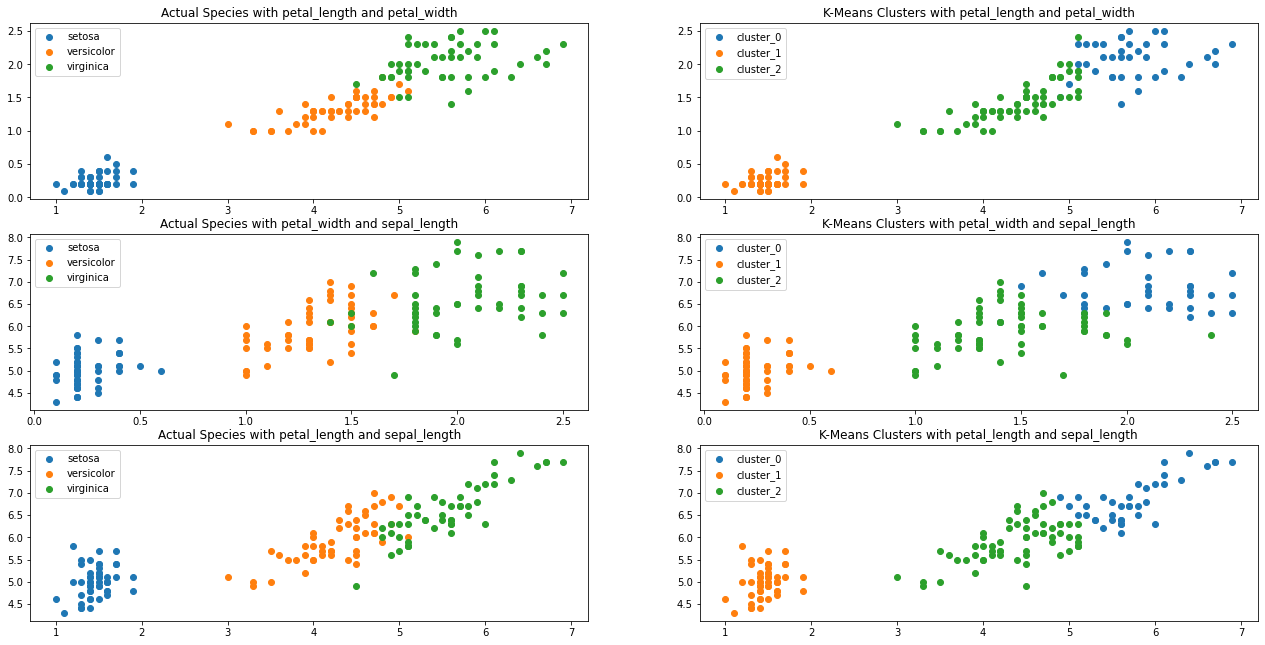

In [19]:
# function to visualize clustering with 3 different features.
fig, axs = plt.subplots(3, 2, figsize=(22, 11))

for species, subset in iris.groupby('species'):
    axs[0,0].scatter(subset.petal_length, subset.petal_width, label=species)
    
axs[0,0].legend()
axs[0,0].set(title='Actual Species with petal_length and petal_width')
    
for cluster_n in iris.three_feature_cluster.sort_values().unique():
    axs[0,1].scatter(iris[iris.three_feature_cluster == cluster_n].petal_length, iris[iris.three_feature_cluster == cluster_n].petal_width, label=f'cluster_{cluster_n}')

axs[0,1].legend()
axs[0,1].set(title="K-Means Clusters with petal_length and petal_width")

for species, subset in iris.groupby('species'):
    axs[1,0].scatter(subset.petal_width, subset.sepal_length, label=species)
    
axs[1,0].legend()
axs[1,0].set(title='Actual Species with petal_width and sepal_length')

for cluster_n in iris.three_feature_cluster.sort_values().unique():
    axs[1,1].scatter(iris[iris.three_feature_cluster == cluster_n].petal_width, iris[iris.three_feature_cluster == cluster_n].sepal_length, label=f'cluster_{cluster_n}')

axs[1,1].legend()
axs[1,1].set(title="K-Means Clusters with petal_width and sepal_length")

for species, subset in iris.groupby('species'):
    axs[2,0].scatter(subset.petal_length, subset.sepal_length, label=species)
    
axs[2,0].legend()
axs[2,0].set(title='Actual Species with petal_length and sepal_length')

for cluster_n in iris.three_feature_cluster.sort_values().unique():
    axs[2,1].scatter(iris[iris.three_feature_cluster == cluster_n].petal_length, iris[iris.three_feature_cluster == cluster_n].sepal_length, label=f'cluster_{cluster_n}')

axs[2,1].legend()
axs[2,1].set(title="K-Means Clusters with petal_length and sepal_length")

plt.show()